In [1]:
import torch
import torch.nn as nn

In [2]:
# Definindo o corpus de texto
corpus = ['Este é o primeiro documento.', 'Este é o segundo documento.', 'Este é o terceiro documento.', 'Este é o quarto documento.']

In [3]:
# Criando um vocabulário a partir do corpus
vocab = set([word for doc in corpus for word in doc.split()])

In [30]:
len(vocab)

8

In [4]:
# Mapeando cada palavra do vocabulário para um índice inteiro
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [5]:
embedding_dim = 10

In [7]:
embeddings = nn.Embedding(len(vocab), embedding_dim)

In [8]:
# Criando uma função que recebe um documento como entrada e retorna o seu vetor de embeddings médio
def doc_to_embeddings(doc):
    word_idxs = [word_to_ix[word] for word in doc.split()]
    word_idxs = torch.tensor(word_idxs, dtype=torch.long)
    doc_emb = embeddings(word_idxs)
    doc_emb = torch.mean(doc_emb, dim=0)
    return doc_emb

In [9]:
# Criando vetores de embeddings para cada documento no corpus
docs_as_embeddings = []
for doc in corpus:
    doc_emb = doc_to_embeddings(doc)
    docs_as_embeddings.append(doc_emb)

In [10]:
# Imprimindo os vetores de embeddings para cada documento
for i, doc in enumerate(docs_as_embeddings):
    print(f"Documento {i+1}:\n{doc}\n")

Documento 1:
tensor([-1.0177,  0.2053,  0.4788,  0.1768, -0.0499, -0.1380, -0.1935,  0.3691,
        -0.4522,  0.0322], grad_fn=<MeanBackward1>)

Documento 2:
tensor([-0.8005,  0.4950,  0.0279, -0.0313, -0.1615, -0.5196, -0.1119,  0.1045,
        -0.3910, -0.3502], grad_fn=<MeanBackward1>)

Documento 3:
tensor([-1.0510,  0.0069,  0.3746,  0.0326, -0.0828, -0.1120, -0.3664, -0.1557,
        -0.5247, -0.6903], grad_fn=<MeanBackward1>)

Documento 4:
tensor([-0.9623,  0.3775, -0.2943,  0.2013,  0.1665, -0.3003, -0.4913,  0.1268,
        -0.3808, -0.1776], grad_fn=<MeanBackward1>)



#### Plotando as embeddings em um espaço de duas dimensões

In [24]:
import matplotlib.pyplot as plt
# Biblioteca para reduzir a dimensionalidade das embeddings
from sklearn.manifold import TSNE
import numpy as np

In [21]:
docs_as_embeddings

[tensor([-1.0177,  0.2053,  0.4788,  0.1768, -0.0499, -0.1380, -0.1935,  0.3691,
         -0.4522,  0.0322], grad_fn=<MeanBackward1>),
 tensor([-0.8005,  0.4950,  0.0279, -0.0313, -0.1615, -0.5196, -0.1119,  0.1045,
         -0.3910, -0.3502], grad_fn=<MeanBackward1>),
 tensor([-1.0510,  0.0069,  0.3746,  0.0326, -0.0828, -0.1120, -0.3664, -0.1557,
         -0.5247, -0.6903], grad_fn=<MeanBackward1>),
 tensor([-0.9623,  0.3775, -0.2943,  0.2013,  0.1665, -0.3003, -0.4913,  0.1268,
         -0.3808, -0.1776], grad_fn=<MeanBackward1>)]

In [28]:
emb_matrix = np.ndarray(shape=(4, 10))

for i in range(len(docs_as_embeddings)):
    emb_matrix[i] = docs_as_embeddings[i].detach().numpy()
    
emb_matrix

array([[-1.01769197,  0.20526448,  0.47881204,  0.17678361, -0.04987741,
        -0.13795483, -0.1935461 ,  0.36910352, -0.45217752,  0.03224187],
       [-0.80045748,  0.49500966,  0.02793351, -0.03125722, -0.16150108,
        -0.51961899, -0.11187689,  0.10445713, -0.39103931, -0.35022703],
       [-1.05096316,  0.00688679,  0.3746314 ,  0.03263867, -0.08275142,
        -0.11197574, -0.36644468, -0.15566415, -0.52470756, -0.69033498],
       [-0.96230614,  0.37754136, -0.29425031,  0.20126636,  0.16653231,
        -0.30033642, -0.49130797,  0.12683824, -0.38076314, -0.17755614]])

In [36]:
# assume que as embeddings estão armazenadas em um objeto 'embeddings' de dimensões (vocab_size x embedding_dim)
# 'word_list' é uma lista de palavras correspondentes às embeddings

tsne = TSNE(n_components=2, random_state=0, perplexity=2)
embeddings_2d = tsne.fit_transform(emb_matrix)

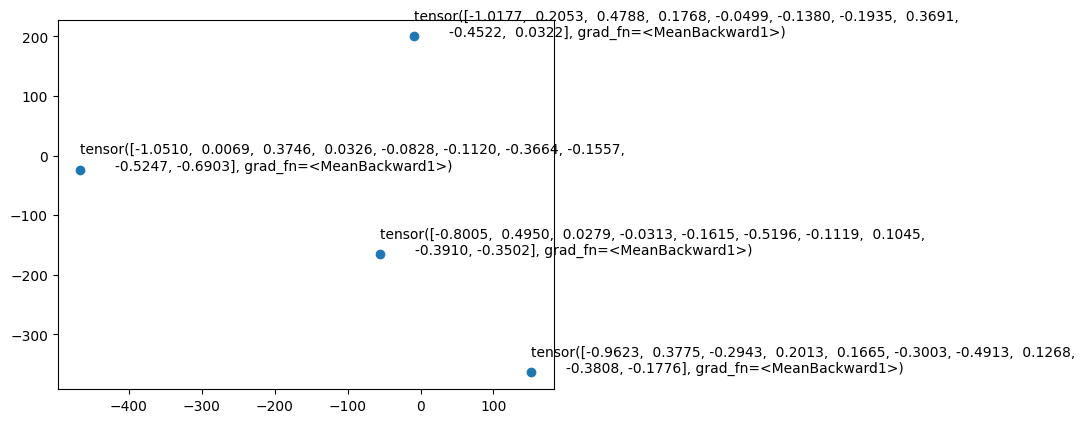

In [39]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
for i, doc in enumerate(docs_as_embeddings):
    plt.annotate(doc, (embeddings_2d[i,0], embeddings_2d[i,1]))
plt.show()